#### Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from  plotly.offline import init_notebook_mode,iplot,plot
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

#### Data Collection & Processing

In [2]:
# Load the data from CSV file to Pandas Dataframe
with open("C:/Users/admin/Downloads/archive (10)/IMDb Movies India.csv", 'r', errors='replace') as file:
    # Read the file using pandas' read_csv() function
    movies_data = pd.read_csv(file)

In [3]:
# printing the first five rows of the dataset
movies_data.head()

Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4      Antara Mali

In [4]:
# number of rows and column
movies_data.shape

(15509, 10)

In [5]:
# getting information about the data
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [6]:
# Check the missing values in each column
movies_data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

#### Handling the Missing values

In [7]:
movies_data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [8]:
# Splitting the 'duration' column into two columns
movies_data[['Duration_', 'duration_minutes']] = movies_data['Duration'].str.split(' ', expand=True)

# Displaying the DataFrame with the new columns
print(movies_data.head())


                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3 Duration_ duration_minutes  
0  Rajendra Bhatia       NaN              NaN  
1    Arvind Ja

In [9]:
# finding the mode value of the 'duration_minutes' column
print(movies_data['duration_minutes'].mode())

0    min
Name: duration_minutes, dtype: object


In [10]:
print(movies_data['duration_minutes'].mode()[0])

min


In [11]:
# replacing the missing value 'duration_minutes' column with mode value
movies_data['duration_minutes'].fillna(movies_data['duration_minutes'].mode()[0],inplace=True)

In [12]:
# replacing the missing values in 'duration_hours' column with mean value
movies_data['Duration_'] = pd.to_numeric(movies_data['Duration_'], errors='coerce')
movies_data['Duration_'].fillna(movies_data['Duration_'].mean(), inplace=True)
movies_data['Duration_'] = movies_data['Duration_'].round()

In [13]:
movies_data['Rating'].fillna(movies_data['Rating'].mean(), inplace=True)
movies_data['Rating'] = movies_data['Rating'].round(2)

In [14]:
movies_data['Votes'].unique()

array([nan, '8', '35', ..., '70,344', '408', '1,496'], dtype=object)

In [15]:
# Replace non-digit characters with an empty string
movies_data['Votes'] = movies_data['Votes'].replace('[^\d]', '', regex=True)

# Fill NaN values with zeros
movies_data['Votes'].fillna(0, inplace=True)

# Convert remaining values to integers
movies_data['Votes'] = movies_data['Votes'].astype(int)


In [16]:
movies_data['Votes'].fillna(movies_data['Votes'].mean(), inplace=True)

In [17]:
movies_data.isnull().sum()

Name                   0
Year                 528
Duration            8269
Genre               1877
Rating                 0
Votes                  0
Director             525
Actor 1             1617
Actor 2             2384
Actor 3             3144
Duration_              0
duration_minutes       0
dtype: int64

In [18]:
# Drop a column named 'Duration'
movies_data = movies_data.drop(columns=['Duration'])
movies_data = movies_data.drop(columns=['duration_minutes'])


In [19]:
movies_data ['Duration_']

0        128.0
1        109.0
2         90.0
3        110.0
4        105.0
         ...  
15504    128.0
15505    129.0
15506    128.0
15507    128.0
15508    130.0
Name: Duration_, Length: 15509, dtype: float64

In [20]:
movies_data.isnull().sum()

Name            0
Year          528
Genre        1877
Rating          0
Votes           0
Director      525
Actor 1      1617
Actor 2      2384
Actor 3      3144
Duration_       0
dtype: int64

In [21]:
movies_data.shape

(15509, 10)

In [22]:
movies_data.isnull().sum()

Name            0
Year          528
Genre        1877
Rating          0
Votes           0
Director      525
Actor 1      1617
Actor 2      2384
Actor 3      3144
Duration_       0
dtype: int64

In [23]:
# finding the mode value of the 'Director' column
print(movies_data['Director'].mode())

0    Jayant Desai
Name: Director, dtype: object


In [24]:
movies_data.describe()

Rating          Votes     Duration_
count  15509.000000   15509.000000  15509.000000
mean       5.840828     989.854858    128.059062
std        0.987343    8346.895970     19.753889
min        1.100000       0.000000      2.000000
25%        5.840000       0.000000    128.000000
50%        5.840000       6.000000    128.000000
75%        6.000000      59.000000    129.000000
max       10.000000  591417.000000    321.000000

In [25]:
movies_data.isnull().sum()

Name            0
Year          528
Genre        1877
Rating          0
Votes           0
Director      525
Actor 1      1617
Actor 2      2384
Actor 3      3144
Duration_       0
dtype: int64

In [26]:
movies_data.shape

(15509, 10)

In [27]:
# Drop a column named 'Actor 2' & 'Actor 3 '
# Drop the 'Actor 2' and 'Actor 3' columns
# Drop the 'Actor 2' and 'Actor 3' columns if they exist
movies_data.drop(['Actor 2','Actor 3'],axis=1,inplace=True)

In [28]:
movies_data.isnull().sum()

Name            0
Year          528
Genre        1877
Rating          0
Votes           0
Director      525
Actor 1      1617
Duration_       0
dtype: int64

In [29]:
movies_data.shape

(15509, 8)

In [30]:
movies_data.dropna(inplace=True)

In [31]:
movies_data.isnull().sum()

Name         0
Year         0
Genre        0
Rating       0
Votes        0
Director     0
Actor 1      0
Duration_    0
dtype: int64

In [32]:
movies_data.head()

Name    Year                   Genre  Rating  \
1  #Gadhvi (He thought he was Gandhi)  (2019)                   Drama    7.00   
2                         #Homecoming  (2021)          Drama, Musical    5.84   
3                             #Yaaram  (2019)         Comedy, Romance    4.40   
4                   ...And Once Again  (2010)                   Drama    5.84   
5                ...Aur Pyaar Ho Gaya  (1997)  Comedy, Drama, Musical    4.70   

   Votes            Director       Actor 1  Duration_  
1      8       Gaurav Bakshi  Rasika Dugal      109.0  
2      0  Soumyajit Majumdar  Sayani Gupta       90.0  
3     35          Ovais Khan       Prateik      110.0  
4      0        Amol Palekar  Rajat Kapoor      105.0  
5    827        Rahul Rawail    Bobby Deol      147.0

In [33]:
movies_data['Year'] = movies_data['Year'].astype(str).str.replace(r'[()]','',regex=True)

In [34]:
movies_data['Name'] = movies_data['Name'].str.replace(r'\s*\([^()]*\)', '', regex=True).str.lstrip('#')

In [35]:
movies_data.head()

Name  Year                   Genre  Rating  Votes  \
1                Gadhvi  2019                   Drama    7.00      8   
2            Homecoming  2021          Drama, Musical    5.84      0   
3                Yaaram  2019         Comedy, Romance    4.40     35   
4     ...And Once Again  2010                   Drama    5.84      0   
5  ...Aur Pyaar Ho Gaya  1997  Comedy, Drama, Musical    4.70    827   

             Director       Actor 1  Duration_  
1       Gaurav Bakshi  Rasika Dugal      109.0  
2  Soumyajit Majumdar  Sayani Gupta       90.0  
3          Ovais Khan       Prateik      110.0  
4        Amol Palekar  Rajat Kapoor      105.0  
5        Rahul Rawail    Bobby Deol      147.0

### Data Analysis

In [36]:
# getting some statistical measure about the data
movies_data.describe()

Rating          Votes     Duration_
count  12029.000000   12029.000000  12029.000000
mean       5.829070    1275.695403    128.884280
std        1.099829    9458.534229     20.694037
min        1.100000       0.000000     21.000000
25%        5.500000       0.000000    128.000000
50%        5.840000      15.000000    128.000000
75%        6.400000     121.000000    135.000000
max       10.000000  591417.000000    321.000000

### Data Visualization

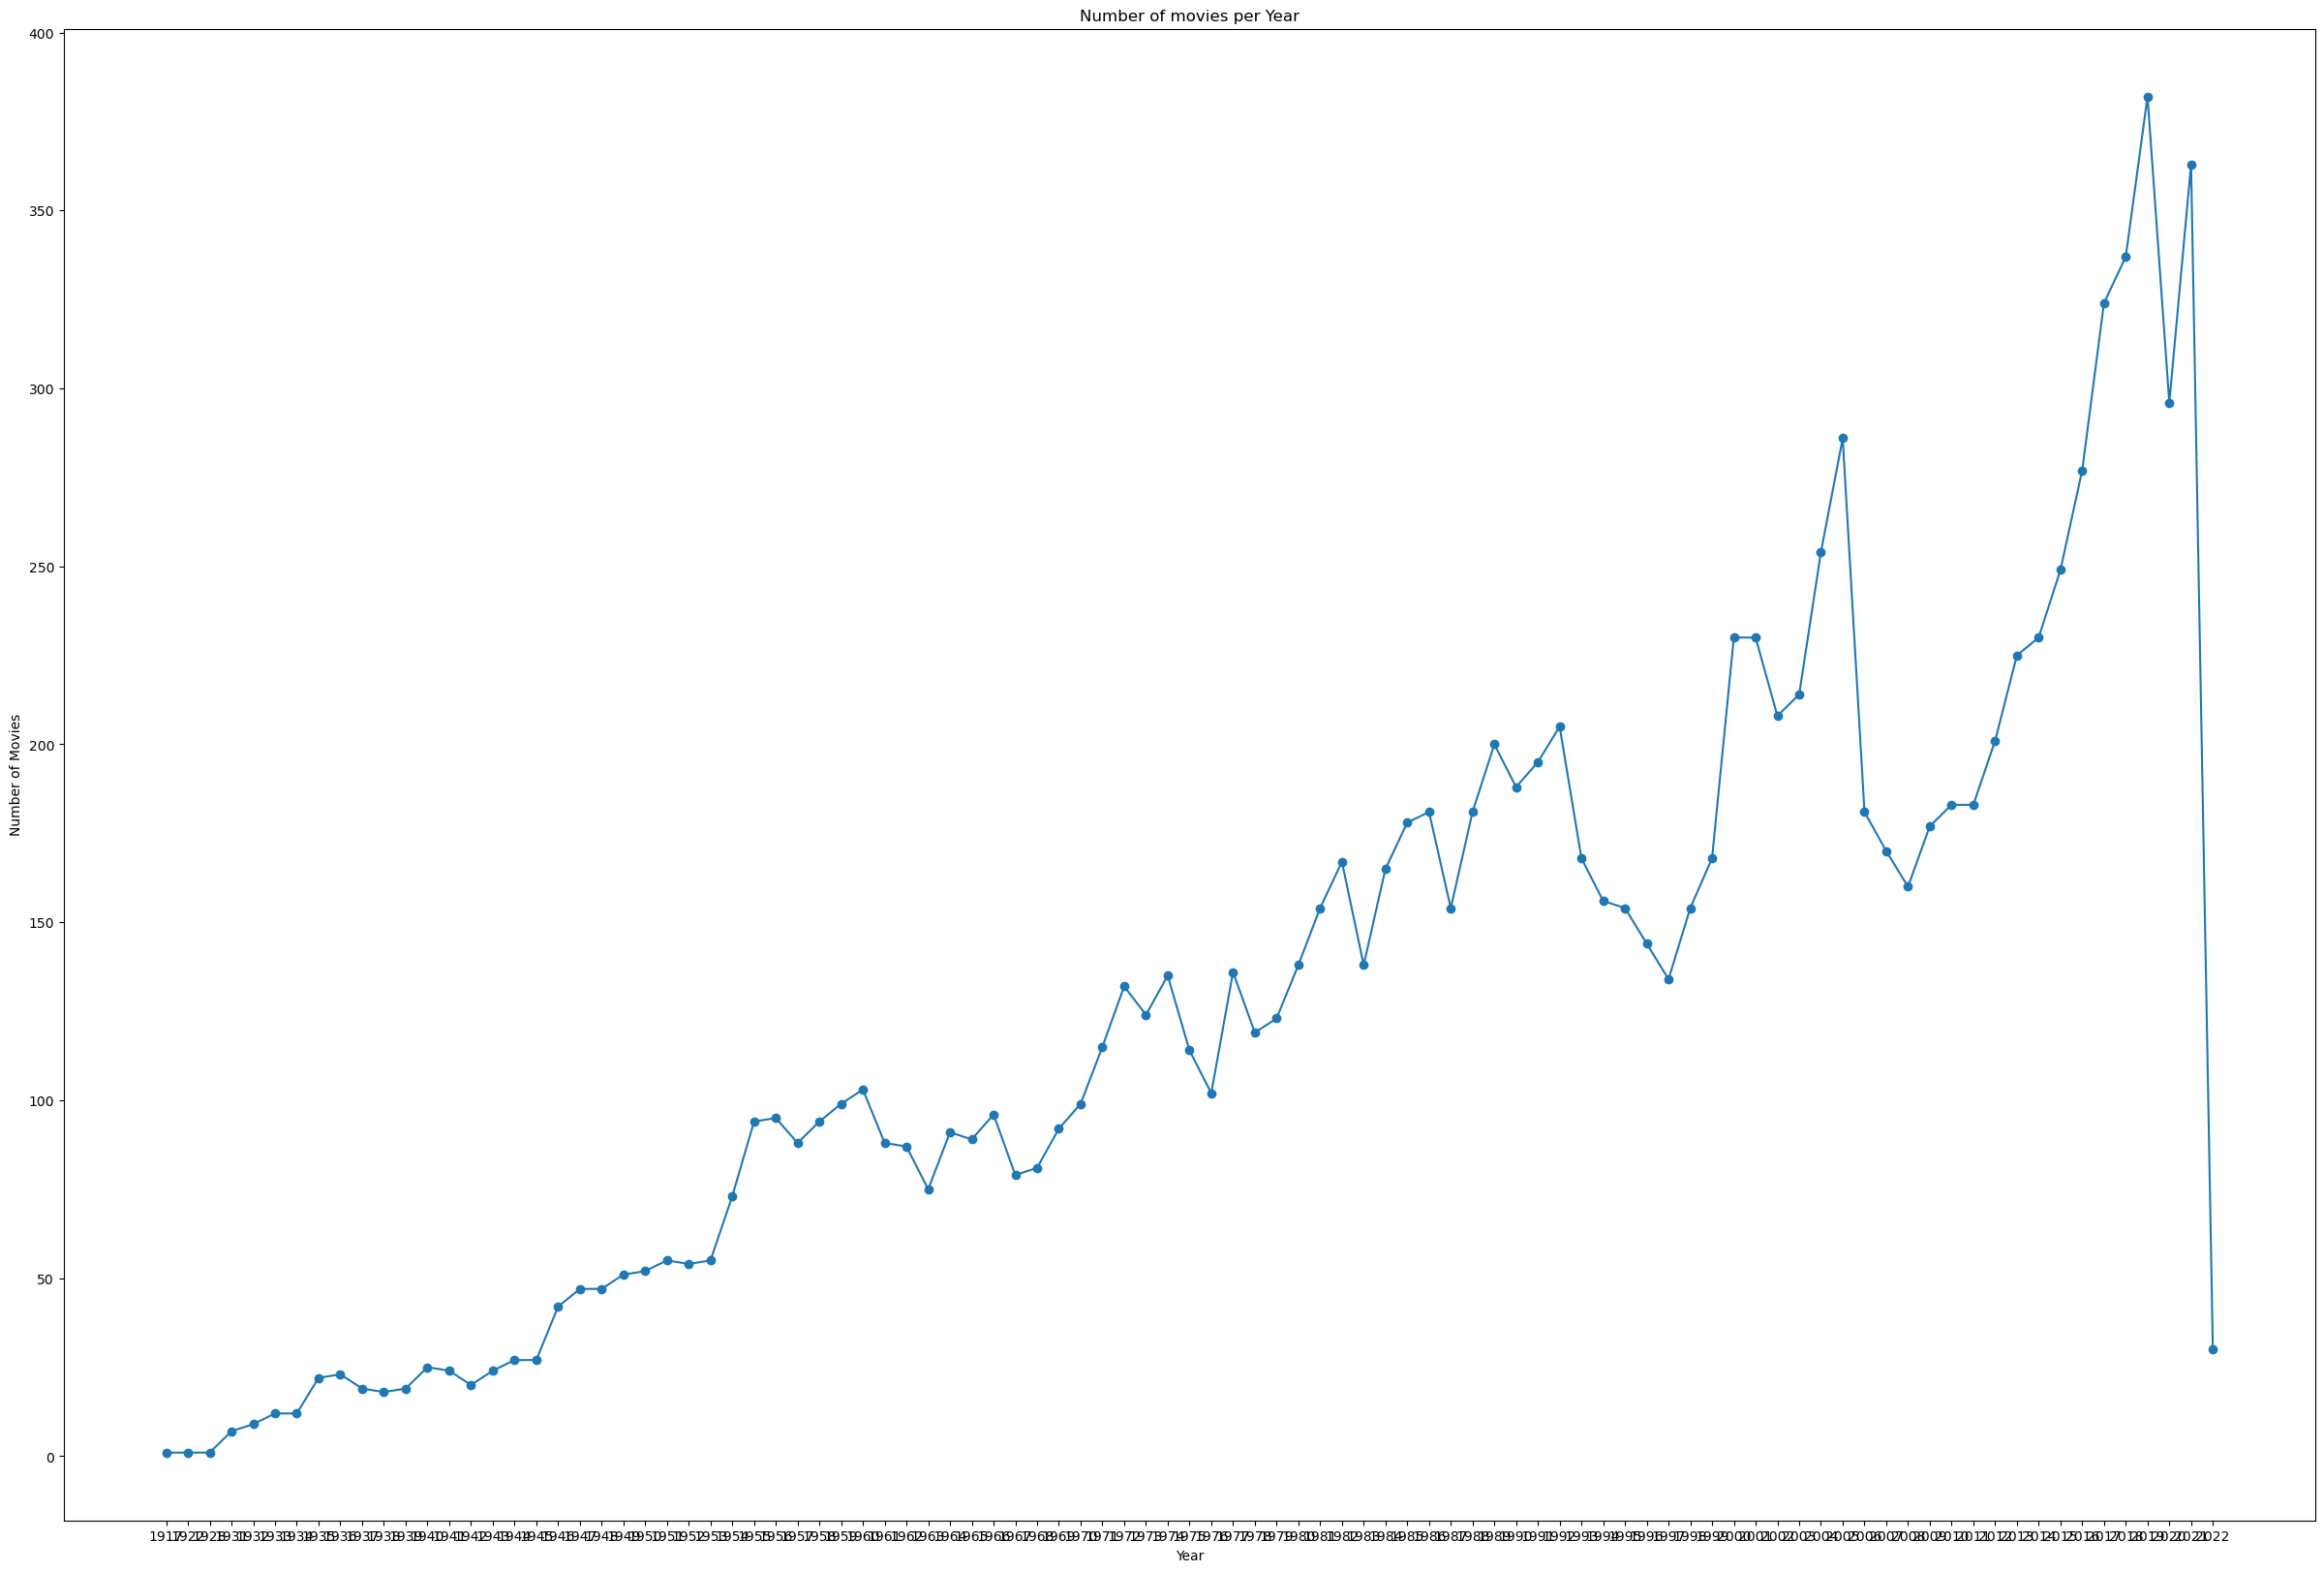

In [37]:
plt.figure(figsize=(30,20))
year_count = movies_data['Year'].value_counts().sort_index()
years = year_count.index

plt.plot(years,year_count,marker='o')

plt.title('Number of movies per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

plt.show()

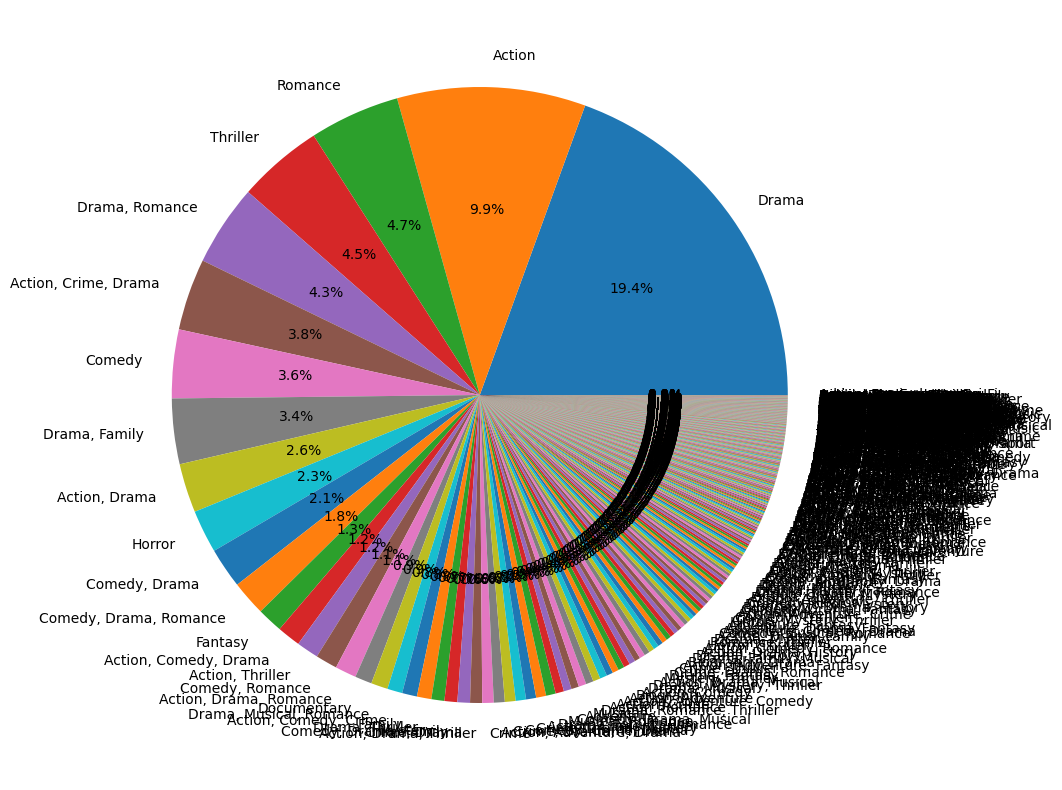

In [38]:
label = movies_data['Genre'].value_counts().index
size = movies_data['Genre'].value_counts()
plt.figure(figsize=(10,10))
plt.pie(size,labels = label, startangle= 0, shadow= False, autopct= '%1.1f%%')
plt.show()

In [39]:
px.scatter(movies_data,x='Rating',y ='Votes',color='Rating',color_continuous_scale = px.colors.sequential.Plasma,title='Rating Versue Votes')

In [40]:
px.scatter(movies_data,x='Rating',y ='Duration_',color='Rating',color_continuous_scale = px.colors.sequential.Plasma,title='Rating Versue Duration')

#### Building Model

In [41]:
movies_data.columns

Index(['Name', 'Year', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1',
       'Duration_'],
      dtype='object')

#### Encoding the Categorical Column

In [42]:
movies_data['Director_Encoding'] = movies_data.groupby('Director')['Rating'].transform('mean')
movies_data['Actor_1_Encoding'] = movies_data.groupby('Actor 1')['Rating'].transform('mean')
movies_data['Genre_Encoding'] = movies_data.groupby('Genre')['Rating'].transform('mean')

#### Seprating Target & Feature

In [43]:
X = movies_data.drop(columns=['Name','Genre','Rating','Director','Actor 1'],axis=1)
Y = movies_data['Rating']

In [44]:
X

Year  Votes  Duration_  Director_Encoding  Actor_1_Encoding  \
1      2019      8      109.0           7.000000          6.850000   
2      2021      0       90.0           5.840000          6.420000   
3      2019     35      110.0           4.400000          5.420000   
4      2010      0      105.0           6.262857          6.806667   
5      1997    827      147.0           5.358824          4.844211   
...     ...    ...        ...                ...               ...   
15503  1989     44      125.0           5.882667          6.075862   
15504  1988     11      128.0           4.075000          6.021667   
15505  1999    655      129.0           5.225000          5.498372   
15506  2005      0      128.0           5.840000          5.840000   
15508  1998     20      130.0           4.350000          5.746714   

       Genre_Encoding  
1            6.095708  
2            6.350000  
3            5.737080  
4            6.095708  
5            6.224490  
...               ...  
15503        5.633863  
15504        5.577578  
15505        5.509677  
15506        5.577578  
15508        5.509677  

[12029 rows x 6 columns]

In [45]:
Y

1        7.00
2        5.84
3        4.40
4        5.84
5        4.70
         ... 
15503    5.80
15504    4.60
15505    4.50
15506    5.84
15508    6.20
Name: Rating, Length: 12029, dtype: float64

### Splitting the data into tranning data & test data

In [46]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

In [47]:
print(X.shape,X_train.shape,X_test.shape)

(12029, 6) (8420, 6) (3609, 6)


#### Model Traning

### LinearRegression

In [48]:
lr = LinearRegression()

In [49]:
# training the LinearRegression model
lr.fit(X_train,Y_train)

LinearRegression()

In [50]:
# Make Prediction on the test
y_pred = lr.predict(X_test)

In [51]:
# Evaluate the Model
mse = mean_squared_error(Y_test,y_pred)
mae = mean_absolute_error(Y_test,y_pred)
r2_score = r2_score(Y_test,y_pred)

In [52]:
# Print the Evaluation metrics
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R2 Score: {r2_score:.4f}")

Mean Squared Error: 0.4100
Mean Absolute Error: 0.4397
R2 Score: 0.6479


### Scatter plot to campare actual and predicted rating

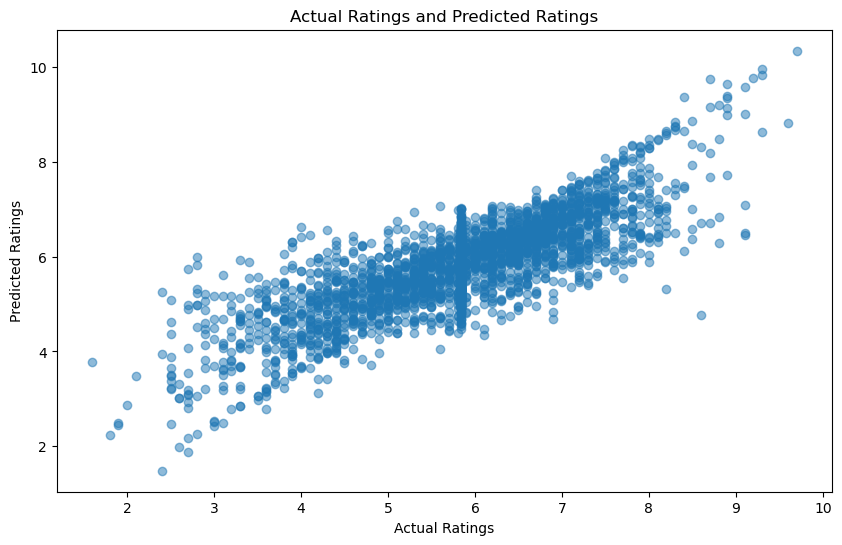

In [53]:
plt.figure(figsize=(10,6))
plt.scatter(Y_test,y_pred,alpha=0.5)
plt.title('Actual Ratings and Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

#### Residual plot to assess Model error distribution

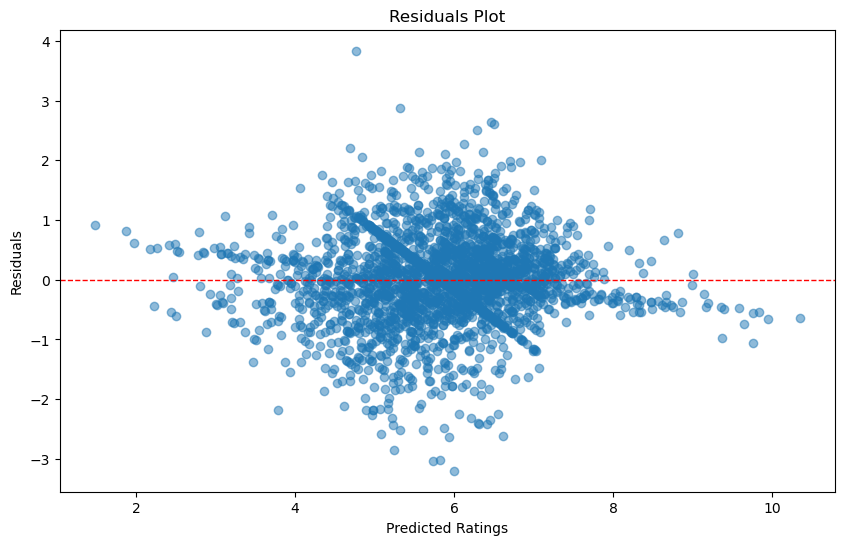

In [56]:
residuals = Y_test - y_pred
plt.figure(figsize=(10,6))
plt.scatter(y_pred,residuals, alpha=0.5)
plt.title('Residuals Plot')
plt.xlabel('Predicted Ratings')
plt.ylabel('Residuals')
plt.axhline(y=0,color='r',linestyle = '--',linewidth=1)
plt.show()

### Distribution of residuals

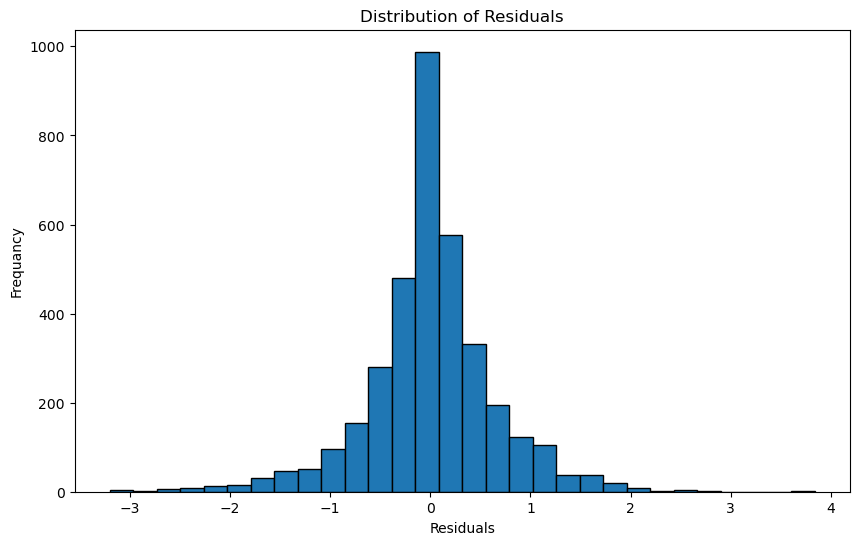

In [57]:
plt.figure(figsize=(10,6))
plt.hist(residuals,bins=30,edgecolor='black')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequancy')
plt.show()